Epoch 1/50
4/4 [==============================] - 2s 12ms/step - loss: 0.4654
Epoch 2/50
4/4 [==============================] - 0s 10ms/step - loss: 0.2035
Epoch 3/50
4/4 [==============================] - 0s 13ms/step - loss: 0.0734
Epoch 4/50
4/4 [==============================] - 0s 10ms/step - loss: 0.0911
Epoch 5/50
4/4 [==============================] - 0s 9ms/step - loss: 0.0609
Epoch 6/50
4/4 [==============================] - 0s 10ms/step - loss: 0.0530
Epoch 7/50
4/4 [==============================] - 0s 9ms/step - loss: 0.0550
Epoch 8/50
4/4 [==============================] - 0s 10ms/step - loss: 0.0500
Epoch 9/50
4/4 [==============================] - 0s 9ms/step - loss: 0.0435
Epoch 10/50
4/4 [==============================] - 0s 9ms/step - loss: 0.0411
Epoch 11/50
4/4 [==============================] - 0s 9ms/step - loss: 0.0399
Epoch 12/50
4/4 [==============================] - 0s 9ms/step - loss: 0.0376
Epoch 13/50
4/4 [==============================] - 0s 10ms/step - l

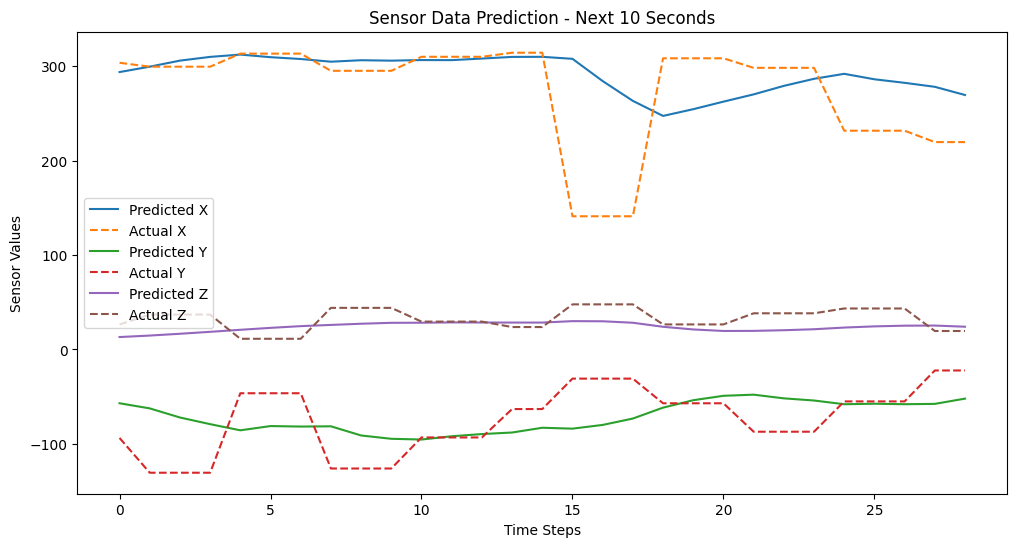

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load the historical sensor data from a text file
# Use the appropriate file path for your environment
data = pd.read_csv('/content/drive/MyDrive/CSVMobile/SensorData.csv')

# Preprocess the data
data_values = data.values  # No need to convert to float initially
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data_values)

# Define a function to create sequences for LSTM training
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length, :])
        y.append(data[i + seq_length, :])
    return np.array(X), np.array(y)

# Set sequence length and split into train and test sets
sequence_length = 10  # Number of time steps to look back
X, y = create_sequences(scaled_data, sequence_length)

# Split into train and test sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build LSTM model
model = Sequential()
model.add(LSTM(100, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(3))  # Assuming X, Y, Z values are predicted
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

# Make predictions
predicted_values = model.predict(X_test)

# Inverse transform predictions and actual values
predicted_values = scaler.inverse_transform(predicted_values)
y_test = scaler.inverse_transform(y_test)

# Plot predicted vs. actual values
plt.figure(figsize=(12, 6))
for i in range(3):  # Plotting X, Y, Z values separately
    plt.plot(predicted_values[:, i], label=f'Predicted {["X", "Y", "Z"][i]}')
    plt.plot(y_test[:, i], label=f'Actual {["X", "Y", "Z"][i]}', linestyle='--')

plt.title('Sensor Data Prediction - Next 10 Seconds')
plt.xlabel('Time Steps')
plt.ylabel('Sensor Values')
plt.legend()
plt.show()


**SENSOR DELAY FASTER**

Epoch 1/50
29/29 [==============================] - 2s 10ms/step - loss: 0.0535
Epoch 2/50
29/29 [==============================] - 0s 10ms/step - loss: 0.0036
Epoch 3/50
29/29 [==============================] - 0s 11ms/step - loss: 0.0021
Epoch 4/50
29/29 [==============================] - 0s 11ms/step - loss: 0.0019
Epoch 5/50
29/29 [==============================] - 0s 11ms/step - loss: 0.0018
Epoch 6/50
29/29 [==============================] - 0s 14ms/step - loss: 0.0016
Epoch 7/50
29/29 [==============================] - 0s 16ms/step - loss: 0.0015
Epoch 8/50
29/29 [==============================] - 0s 15ms/step - loss: 0.0014
Epoch 9/50
29/29 [==============================] - 0s 15ms/step - loss: 0.0013
Epoch 10/50
29/29 [==============================] - 0s 16ms/step - loss: 0.0012
Epoch 11/50
29/29 [==============================] - 0s 16ms/step - loss: 0.0012
Epoch 12/50
29/29 [==============================] - 0s 16ms/step - loss: 0.0011
Epoch 13/50
29/29 [==================

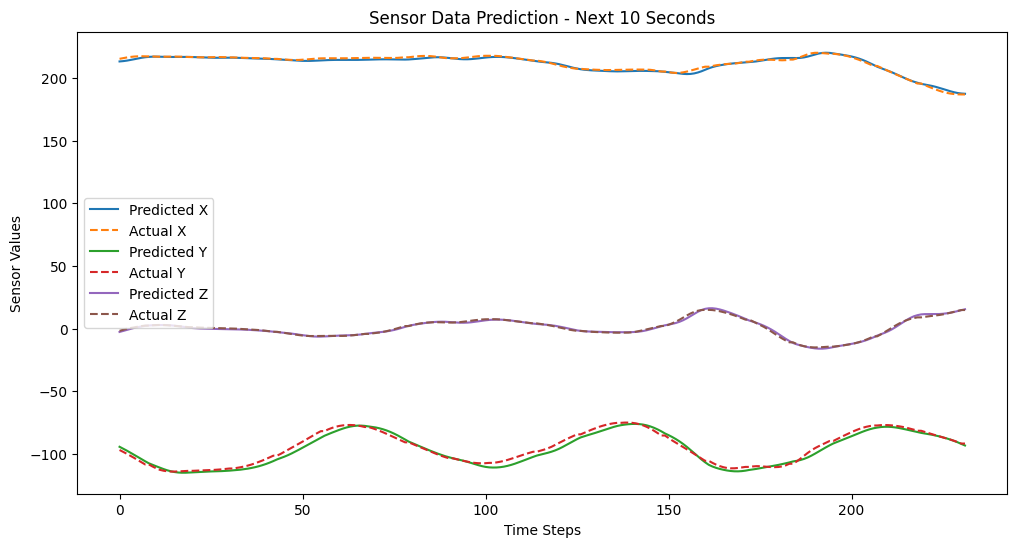

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load the historical sensor data from a text file
# Use the appropriate file path for your environment
data = pd.read_csv('/content/drive/MyDrive/CSVMobile/SensorData.csv')

# Preprocess the data
data_values = data.values  # No need to convert to float initially
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data_values)

# Define a function to create sequences for LSTM training
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length, :])
        y.append(data[i + seq_length, :])
    return np.array(X), np.array(y)

# Set sequence length and split into train and test sets
sequence_length = 10  # Number of time steps to look back
X, y = create_sequences(scaled_data, sequence_length)

# Split into train and test sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build LSTM model
model = Sequential()
model.add(LSTM(100, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(3))  # Assuming X, Y, Z values are predicted
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

# Make predictions
predicted_values = model.predict(X_test)

# Inverse transform predictions and actual values
predicted_values = scaler.inverse_transform(predicted_values)
y_test = scaler.inverse_transform(y_test)

# Plot predicted vs. actual values
plt.figure(figsize=(12, 6))
for i in range(3):  # Plotting X, Y, Z values separately
    plt.plot(predicted_values[:, i], label=f'Predicted {["X", "Y", "Z"][i]}')
    plt.plot(y_test[:, i], label=f'Actual {["X", "Y", "Z"][i]}', linestyle='--')

plt.title('Sensor Data Prediction - Next 10 Seconds')
plt.xlabel('Time Steps')
plt.ylabel('Sensor Values')
plt.legend()
plt.show()


**SENSOR USING SAMPLING OF UI(LEVEL)**

Epoch 1/50
7/7 [==============================] - 2s 11ms/step - loss: 0.2251
Epoch 2/50
7/7 [==============================] - 0s 12ms/step - loss: 0.0518
Epoch 3/50
7/7 [==============================] - 0s 14ms/step - loss: 0.0467
Epoch 4/50
7/7 [==============================] - 0s 11ms/step - loss: 0.0336
Epoch 5/50
7/7 [==============================] - 0s 10ms/step - loss: 0.0310
Epoch 6/50
7/7 [==============================] - 0s 12ms/step - loss: 0.0273
Epoch 7/50
7/7 [==============================] - 0s 11ms/step - loss: 0.0258
Epoch 8/50
7/7 [==============================] - 0s 11ms/step - loss: 0.0232
Epoch 9/50
7/7 [==============================] - 0s 11ms/step - loss: 0.0230
Epoch 10/50
7/7 [==============================] - 0s 11ms/step - loss: 0.0210
Epoch 11/50
7/7 [==============================] - 0s 12ms/step - loss: 0.0210
Epoch 12/50
7/7 [==============================] - 0s 12ms/step - loss: 0.0191
Epoch 13/50
7/7 [==============================] - 0s 12ms/st

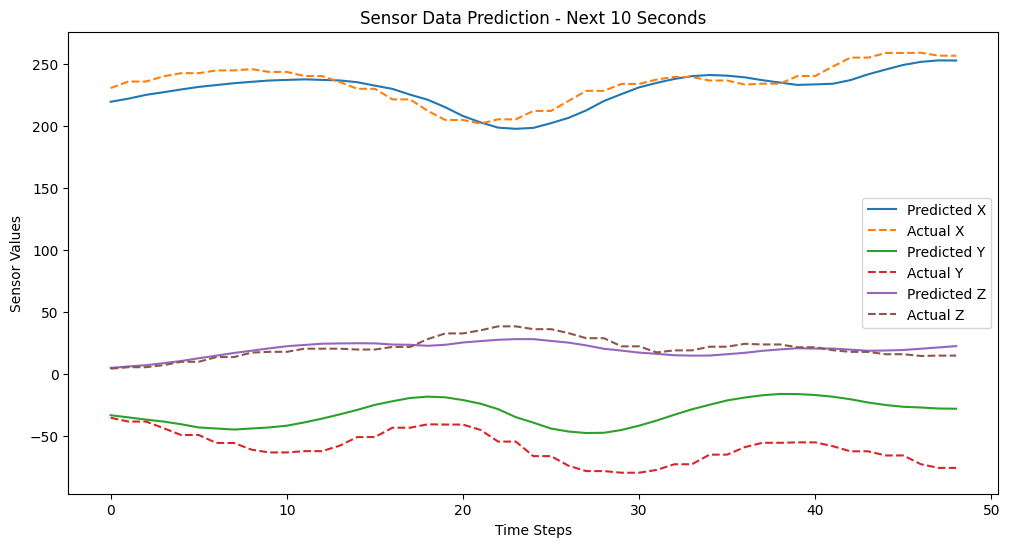

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load the historical sensor data from a text file
# Use the appropriate file path for your environment
data = pd.read_csv('/content/drive/MyDrive/CSVMobile/SensorData(game).csv')

# Preprocess the data
data_values = data.values  # No need to convert to float initially
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data_values)

# Define a function to create sequences for LSTM training
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length, :])
        y.append(data[i + seq_length, :])
    return np.array(X), np.array(y)

# Set sequence length and split into train and test sets
sequence_length = 10  # Number of time steps to look back
X, y = create_sequences(scaled_data, sequence_length)

# Split into train and test sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build LSTM model
model = Sequential()
model.add(LSTM(100, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(3))  # Assuming X, Y, Z values are predicted
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

# Make predictions
predicted_values = model.predict(X_test)

# Inverse transform predictions and actual values
predicted_values = scaler.inverse_transform(predicted_values)
y_test = scaler.inverse_transform(y_test)

# Plot predicted vs. actual values
plt.figure(figsize=(12, 6))
for i in range(3):  # Plotting X, Y, Z values separately
    plt.plot(predicted_values[:, i], label=f'Predicted {["X", "Y", "Z"][i]}')
    plt.plot(y_test[:, i], label=f'Actual {["X", "Y", "Z"][i]}', linestyle='--')

plt.title('Sensor Data Prediction - Next 10 Seconds')
plt.xlabel('Time Steps')
plt.ylabel('Sensor Values')
plt.legend()
plt.show()


**SAMPLING RATE GAME LEVEL**

Epoch 1/50
16/16 [==============================] - 4s 18ms/step - loss: 0.0883
Epoch 2/50
16/16 [==============================] - 0s 18ms/step - loss: 0.0341
Epoch 3/50
16/16 [==============================] - 0s 17ms/step - loss: 0.0247
Epoch 4/50
16/16 [==============================] - 0s 18ms/step - loss: 0.0188
Epoch 5/50
16/16 [==============================] - 0s 18ms/step - loss: 0.0132
Epoch 6/50
16/16 [==============================] - 0s 14ms/step - loss: 0.0085
Epoch 7/50
16/16 [==============================] - 0s 11ms/step - loss: 0.0066
Epoch 8/50
16/16 [==============================] - 0s 11ms/step - loss: 0.0061
Epoch 9/50
16/16 [==============================] - 0s 11ms/step - loss: 0.0061
Epoch 10/50
16/16 [==============================] - 0s 11ms/step - loss: 0.0051
Epoch 11/50
16/16 [==============================] - 0s 11ms/step - loss: 0.0049
Epoch 12/50
16/16 [==============================] - 0s 11ms/step - loss: 0.0044
Epoch 13/50
16/16 [==================

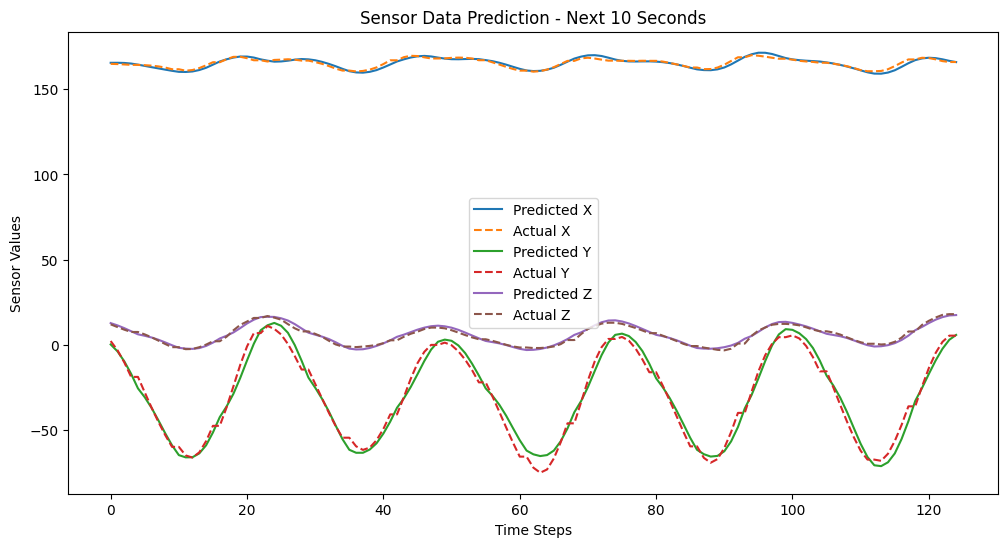

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load the historical sensor data from a text file
# Use the appropriate file path for your environment
data = pd.read_csv('/content/drive/MyDrive/CSVMobile/SensorData(Game).csv')

# Preprocess the data
data_values = data.values  # No need to convert to float initially
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data_values)

# Define a function to create sequences for LSTM training
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length, :])
        y.append(data[i + seq_length, :])
    return np.array(X), np.array(y)

# Set sequence length and split into train and test sets
sequence_length = 10  # Number of time steps to look back
X, y = create_sequences(scaled_data, sequence_length)

# Split into train and test sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build LSTM model
model = Sequential()
model.add(LSTM(100, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(3))  # Assuming X, Y, Z values are predicted
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

# Make predictions
predicted_values = model.predict(X_test)

# Inverse transform predictions and actual values
predicted_values = scaler.inverse_transform(predicted_values)
y_test = scaler.inverse_transform(y_test)

# Plot predicted vs. actual values
plt.figure(figsize=(12, 6))
for i in range(3):  # Plotting X, Y, Z values separately
    plt.plot(predicted_values[:, i], label=f'Predicted {["X", "Y", "Z"][i]}')
    plt.plot(y_test[:, i], label=f'Actual {["X", "Y", "Z"][i]}', linestyle='--')

plt.title('Sensor Data Prediction - Next 10 Seconds')
plt.xlabel('Time Steps')
plt.ylabel('Sensor Values')
plt.legend()
plt.show()
